# İNTRODUCTİON 
#### The sinking of the ocean liner RMS Titanic on April 15, 1912 was one of the most dramatic events of the twentieth century. In a mere four hours after striking an iceberg, the largest passenger ship yet built sank while on its maiden voyage, claiming the lives of over 1,500 persons.



<font color='blue'/>

Content:
    
1. [Load and Check Data](#1)    
1. [Variable Description](#2)
 *  [Univariate Description ](#3)
    *         [Categorical Description ](#4)
    *         [Numerical Description ](#5)

1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
  *   [Find Missing Value](#9)
   *  [Fill Missing Value](#10)
1. [Visualization](#11)   
    * [Correlation Between SibSp-Parch-Fare-Age-Survived](#12)
    * [SibSp - Survived](#13)
    * [Parch - Survived](#14)
    * [Pclass - Survived](#15)
    * [Age - Survived](#16)
    * [Pclass - Survived - Age](#17)
    * [Embarked - Sex - Pclass - Survived](#18)
    * [Embarked - Sex - Fare - Survived](#19)
    * [Fill Missing Value : Age Feature](#20)
    

    
    
    
   
    

    

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

from collections import Counter


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id="1" ></a><br>
# Load and Check Data

In [2]:
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
test_Passengerİd=test_df["PassengerId"]

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="2" ></a><br>
# Variable Description


1. PassengerId : unique id number to each passenger
1. Survived : passenger survive(1) or died(0)
1. Pclass : passenger class
1. Name : name of passenger
1. Sex : gender of passenger
1. Age : age of passenger
1. SibSp : number of siblings/spouses
1. Parch : number of parent/children
1. Ticket : ticket number
1. Fare : amount of money spent on ticket
1. Cabin : cabin category
1. Embarked : port where passenger ambarked (C = Cherbourg , Q = Queenstown , S = Southampton)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* **float64(2) :Fare and Age**
* **int64(5): Pclass , Parch, SibSp , Passengerid and Survived**
* **object(5): Ticket , Cabin, Name , Embarked and Sex**o

<a id="3" ></a><br>
#  Univariate Description Analysis
*         Categorical Description : Pclass , Parch , Survived , Embarked , Sex , Ticked , Cabin , Name , Sibsp 
*         Numerical Description : Age , Passenger , Fare

<a id="4" ></a><br>
## Categorical Description

In [7]:
def bar_plot(variable):
    """
        input: variable ex: "sex"
        output: bar plot & value_count
        
    """
    # get feature
    var= train_df[variable]
    
    # count number of categorical variable[value/sample]
    varValue=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))
    

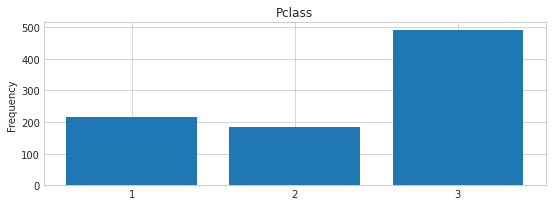

Pclass:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


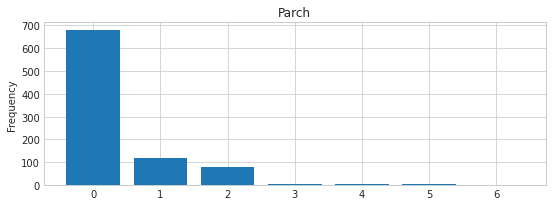

Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


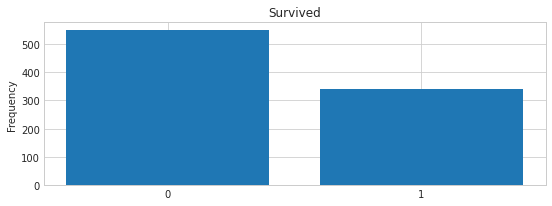

Survived:
 0    549
1    342
Name: Survived, dtype: int64


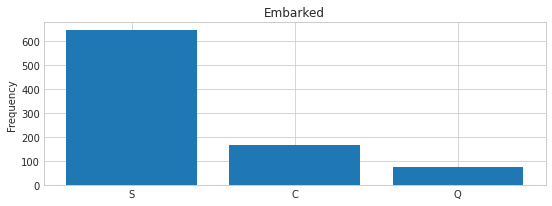

Embarked:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


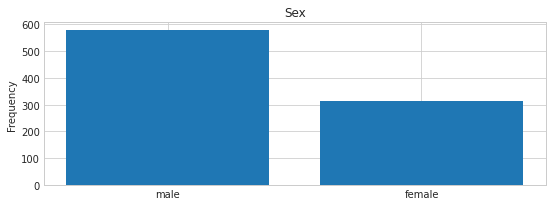

Sex:
 male      577
female    314
Name: Sex, dtype: int64


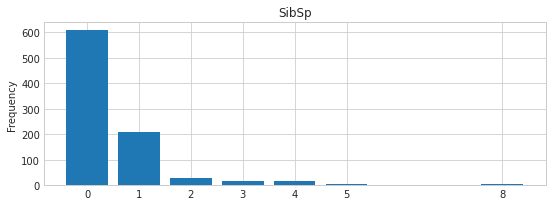

SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [8]:
category=["Pclass" , "Parch" , "Survived" , "Embarked" , "Sex"   , "SibSp"]
for c in category:
    bar_plot(c)

<a id="4" ></a><br>
## Numerical Description  

In [9]:
def hist_plot(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist ".format(variable))
    plt.show()

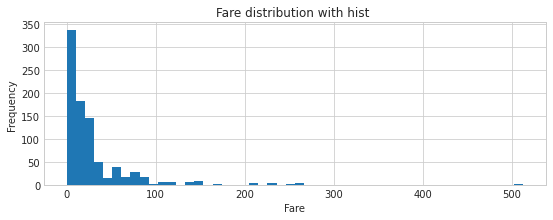

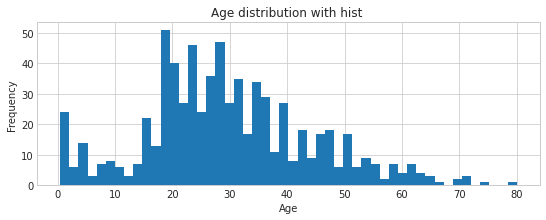

In [10]:
numericvar=["Fare","Age"]
for i in numericvar:
    hist_plot(i)

<a id="6" ></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* Sibsp - Survived
* Parch - Survived


In [11]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id="7" ></a><br>
# Outlier Detection

In [15]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [16]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

<a id="8" ></a><br>
# Missing Value
  *  Find Missing Value
  *  Fill Missing Value

In [18]:
train_df_len=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

<a id="9" ></a><br>

### Find Missing Value


In [19]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [20]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id="10" ></a><br>

### Fill Missing Value
* Embarked has 2 missing value
*     Fare has only one

In [21]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


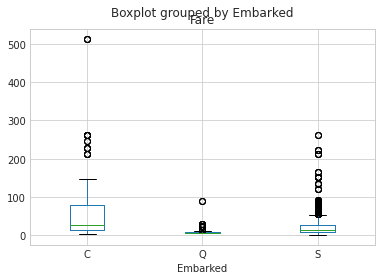

In [22]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [23]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [24]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [25]:
train_df["Pclass"]=train_df["Pclass"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))

In [26]:
train_df[train_df["Pclass"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="11" ></a><br>
# Visualization

<a id="12" ></a><br>
## Correlation Between SibSp-Parch-Fare-Age-Survived

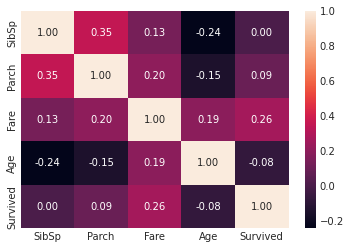

In [27]:
sns.heatmap(train_df[['SibSp','Parch','Fare','Age','Survived']].corr(),annot=True,fmt='.2f')
plt.show()

<a id="13" ></a><br>
## SibSp - Survived

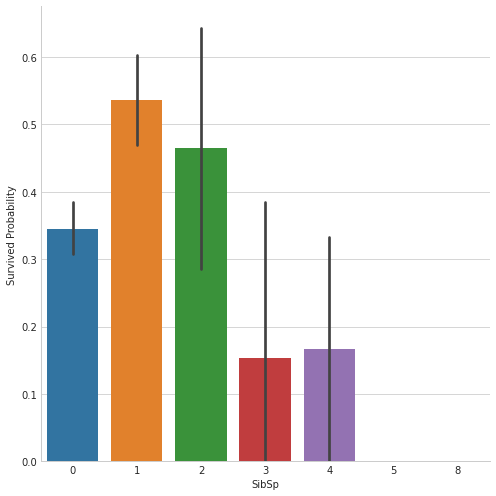

In [28]:
g=sns.factorplot(x='SibSp',y='Survived',data=train_df,kind='bar',size=7)
g.set_ylabels('Survived Probability')
plt.show()

<a id="14" ></a><br>
## Parch - Survived

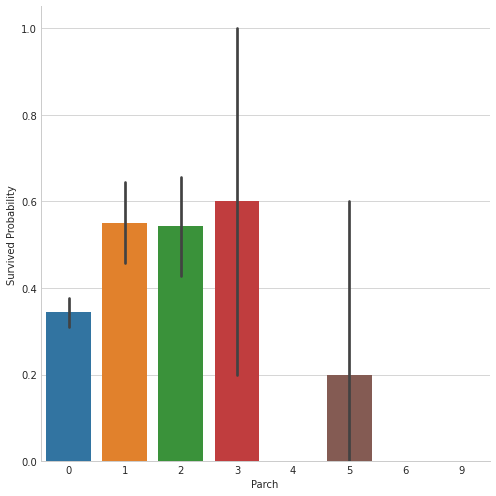

In [29]:
g=sns.factorplot(x='Parch',y='Survived',data=train_df,kind='bar',size=7)
g.set_ylabels('Survived Probability')
plt.show()

<a id="15" ></a><br>
## Pclass - Survived

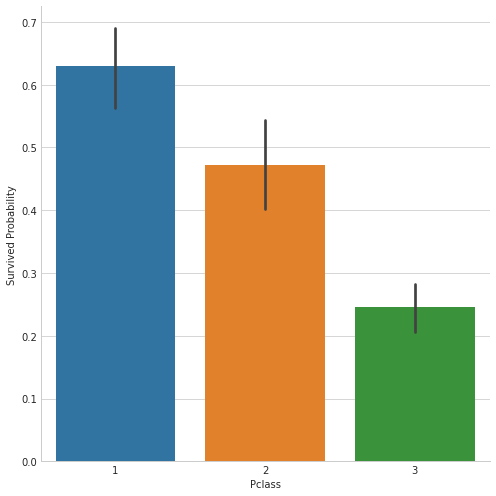

In [30]:
g=sns.factorplot(x='Pclass',y='Survived',data=train_df,kind='bar',size=7)
g.set_ylabels('Survived Probability')
plt.show()

<a id="16" ></a><br>
## Age - Survived

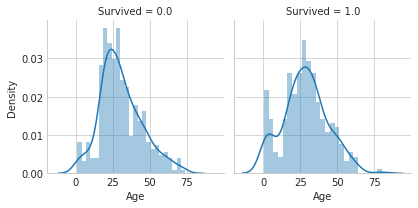

In [31]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(sns.distplot,'Age',bins=25)
plt.show()

<a id="17" ></a><br>
## Pclass - Survived - Age

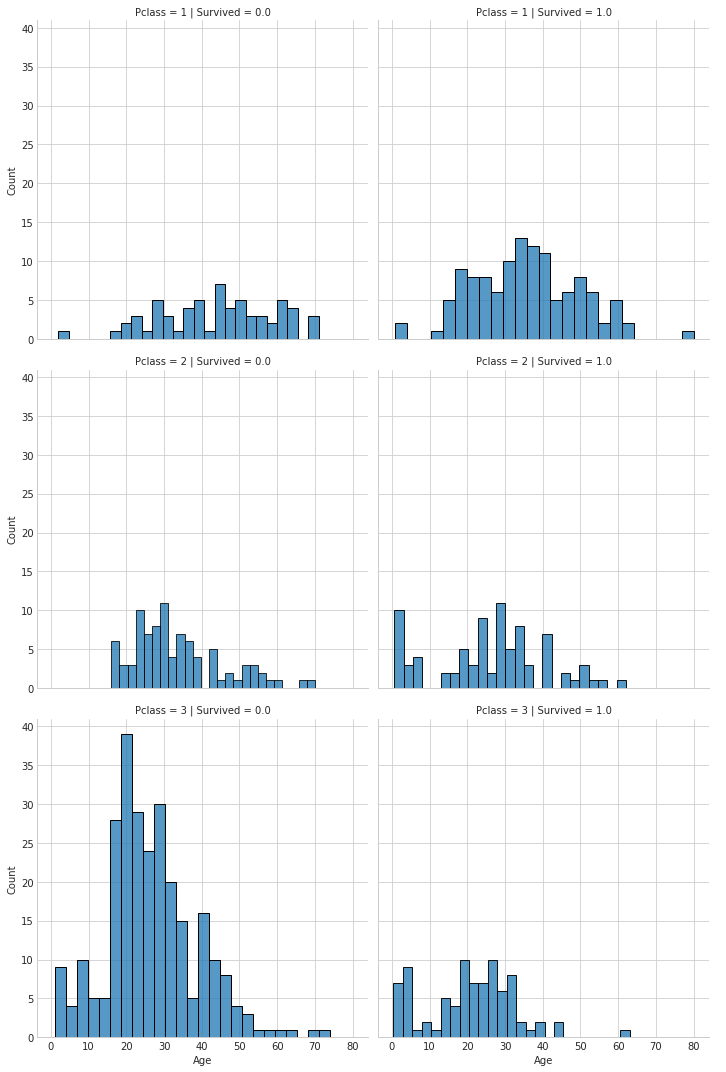

In [32]:
g=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=5)
g.map(sns.histplot,'Age',bins=25)
g.add_legend()
plt.show()

<a id="18" ></a><br>
## Embarked - Sex - Pclass - Survived

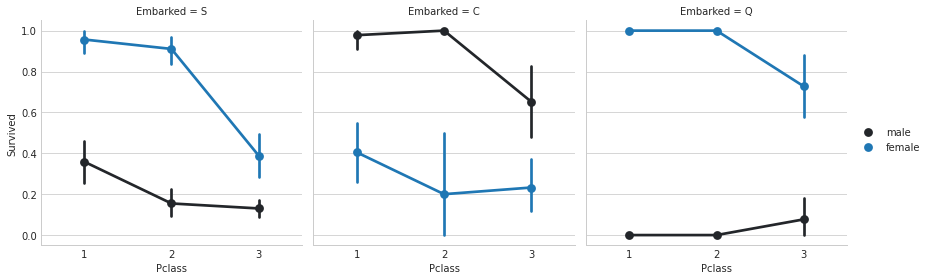

In [33]:
g=sns.FacetGrid(train_df,col='Embarked',size=4)
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()
plt.show()

<a id="19" ></a><br>
## Embarked - Sex - Fare - Survived

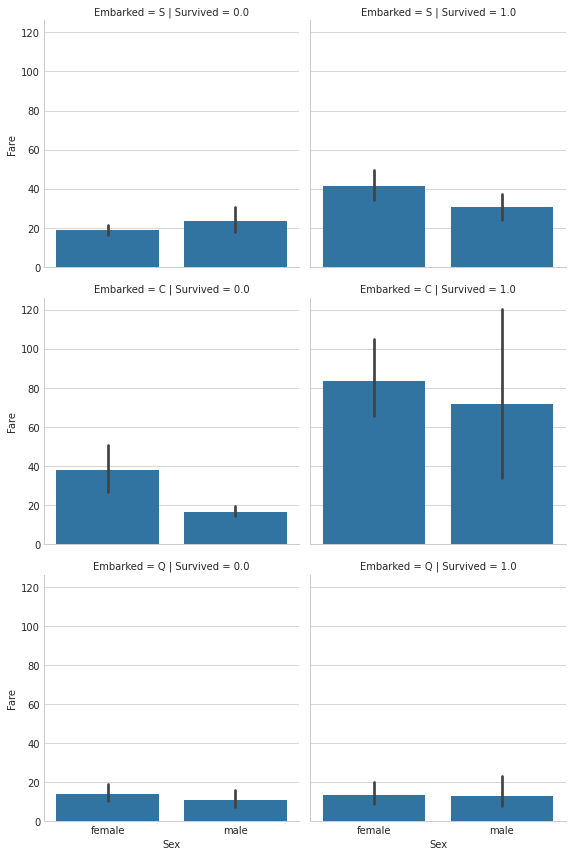

In [34]:
g=sns.FacetGrid(train_df,row='Embarked',col='Survived',size=4)
g.map(sns.barplot,'Sex','Fare')
g.add_legend()
plt.show()

<a id="20" ></a><br>
## Fill Missing Value : Age Feature

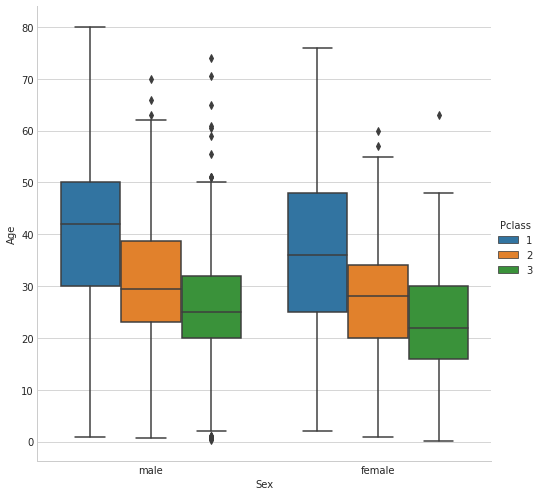

In [35]:
sns.factorplot(x='Sex',y='Age',hue='Pclass',data=train_df,kind='box',size=7)
plt.show()

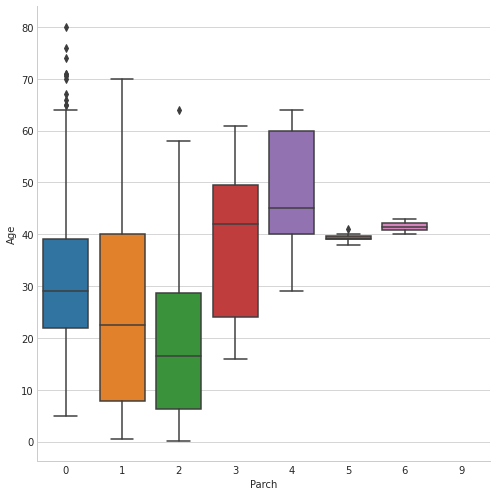

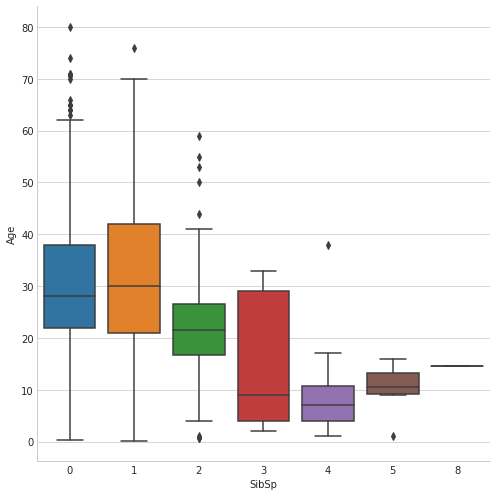

In [36]:
sns.factorplot(x='Parch',y='Age',data=train_df,kind='box',size=7)
sns.factorplot(x='SibSp',y='Age',data=train_df,kind='box',size=7)
plt.show()